In [19]:
import geopandas as gpd
import pandas as pd

In [4]:
Varanus_albigularis_point_observations = gpd.read_file(r"C:\Users\gilbert\Downloads\speciesdle data\Varanus-albigularis\data\Varanus_albigularis.shp")

In [7]:
Varanus_albigularis_point_observations

,dataset,sciname,molid,geomid,presence,season,geometry
0,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,0153b14d-d180-49d1-bb07-085e31ca3d83,f3c96a44-dedb-4c2d-bc69-63d72647c90a,1.0,1.0,POINT (26.80972 -32.85639)
1,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,01a2ee49-923f-4b45-a8a4-db2bb517ceb8,b268b2fd-c30e-41d9-9222-2b8167b6bcf4,1.0,1.0,POINT (30.63436 -24.19296)
2,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,01a9db41-7b1e-4454-8d64-aadada2fce7a,b512fe40-067f-41bb-8d76-d44d53dd4b9d,1.0,1.0,POINT (23.22750 -32.57694)
3,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,02ab6088-dbe8-4dff-aad1-b0fa403563c4,c4477e8a-a158-4b1a-ab8d-c58eba9848a5,1.0,1.0,POINT (31.59236 -24.99298)
4,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,02b51c5e-5adc-419c-99f4-9f293ab3e0fe,6cceb593-76c2-4eba-b2cf-433c521f79a9,1.0,1.0,POINT (29.04379 -24.05876)
...,...,...,...,...,...,...,...
687,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,fe525fd7-3df9-4c52-883d-c3ece5d571fd,dc61f840-8a47-4a7e-a717-104f5469e8ef,1.0,1.0,POINT (30.12500 -30.12500)
688,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,fe68fa2f-c0db-43bf-837f-7c8cc26dd150,658d17f7-d3d6-4be3-974d-de94d9fc79c8,1.0,1.0,POINT (24.87500 -28.12500)
689,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,fec32dd7-a89f-44ee-9109-399008f695f9,c0a490a0-514f-4440-aa77-830a9f9c6277,1.0,1.0,POINT (26.37500 -25.37500)
690,cc861014-6ab3-4ce6-90d4-1134f5a2bcb2,Varanus albigularis,ff6c2e19-4cf8-4a49-aed4-aa8a16112295,7b8dfd00-043b-4d6b-909b-cf83e1d0dd85,1.0,1.0,POINT (32.38056 -27.62889)


<Axes: >

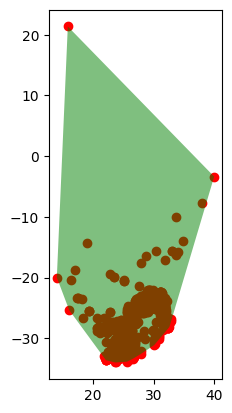

In [9]:
convex_hull = Varanus_albigularis_point_observations.unary_union.convex_hull
convex_hull = gpd.GeoDataFrame({'geometry': convex_hull, 'convex_hull':[1]})

ax = Varanus_albigularis_point_observations['geometry'].plot(color='red')
convex_hull.plot(ax=ax, color='green', alpha=0.5)

### Above we see that there is a single observation of Varanus albigularis that is very far away from the others. We need to prune observation points that are alone and very far away from a cluster somehow.

In [25]:
print(convex_hull.crs)

None


In [27]:
convex_hull.crs = 'EPSG:4326'

In [28]:
convex_hull.explore()